In [6]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [22]:
geneva = pd.read_csv('../data/output/geneva_matchup_skin_meteo.csv')
geneva.sort_values(by='x',).dtypes

x                    int64
y                  float64
y1                 float64
y4                   int64
air_temp           float64
rel_humidity       float64
sol_irr            float64
wind_speed         float64
rainfall           float64
air_pressure       float64
meteo_timestamp    float64
skin_datetime       object
meteo_datetime      object
dtype: object

In [8]:
geneva

,x,y,y1,y4,air_temp,rel_humidity,sol_irr,wind_speed,rainfall,air_pressure,meteo_timestamp,skin_datetime,meteo_datetime
0,1652652000,16.07,NaN,1,19.628333,62.801667,0.001000,5.474750,0.0,974.000000,1.652652e+09,2022-05-16 00:00:00,2022-05-16 00:00:00
1,1652652300,16.22,NaN,1,19.628333,62.801667,0.001000,5.474750,0.0,974.000000,1.652652e+09,2022-05-16 00:05:00,2022-05-16 00:00:00
2,1652652600,16.12,NaN,1,19.522500,63.103333,0.001000,4.918250,0.0,974.000000,1.652653e+09,2022-05-16 00:10:00,2022-05-16 00:10:00
3,1652652900,16.12,NaN,1,19.522500,63.103333,0.001000,4.918250,0.0,974.000000,1.652653e+09,2022-05-16 00:15:00,2022-05-16 00:10:00
4,1652653200,15.48,NaN,1,19.482500,62.904167,0.001083,4.430667,0.0,974.083333,1.652653e+09,2022-05-16 00:20:00,2022-05-16 00:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50667,1657489200,20.19,NaN,1,21.994167,41.576667,0.001000,8.658333,0.0,976.500000,1.657489e+09,2022-07-10 23:40:00,2022-07-10 23:40:00
50668,1657489500,20.05,NaN,1,21.994167,41.576667,0.001000,8.658333,0.0,976.500000,1.657489e+09,2022-07-10 23:45:00,2022-07-10 23:40:00
50669,1657489800,19.97,NaN,1,21.850000,41.957500,0.001000,8.622500,0.0,976.500000,1.657490e+09,2022-07-10 23:50:00,2022-07-10 23:50:00
50670,1657490100,19.92,NaN,1,21.850000,41.957500,0.001000,8.622500,0.0,976.500000,1.657490e+09,2022-07-10 23:55:00,2022-07-10 23:50:00


In [9]:
#geneva.head
#geneva.dtypes
#geneva.describe()
#geneva.query('y.isna()')

In [10]:
geneva.memory_usage(deep=True).sum()

12161408

In [11]:
geneva.drop(['y4'], axis=1).select_dtypes('float64').describe()

,y,y1,air_temp,rel_humidity,sol_irr,wind_speed,rainfall,air_pressure,meteo_timestamp
count,49406.000000,791.000000,50672.000000,50672.000000,50672.000000,50672.000000,50672.000000,50672.000000,5.067200e+04
mean,17.178217,-58.680278,17.173372,64.186952,232.061030,2.500229,0.014366,973.769117,1.654971e+09
std,7.166455,16.718498,6.726839,13.535866,282.297636,1.952797,0.364421,9.051168,6.347778e+06
min,4.840000,-85.500000,0.558750,19.808333,0.000750,0.075000,0.000000,654.409333,1.646708e+09
25%,10.070000,-70.000000,11.216667,55.870208,0.001167,1.215583,0.000000,971.000000,1.650503e+09
50%,17.990000,-62.800000,18.319583,64.628333,76.256292,1.796042,0.000000,975.000000,1.654302e+09
75%,22.850000,-52.200000,22.464167,73.617500,450.935417,3.123750,0.000000,977.583333,1.658101e+09
max,36.830000,-6.500000,34.135833,98.333333,908.916667,12.381667,16.350000,988.083333,1.679476e+09


In [12]:
gplot = (
    geneva
    .assign(meteo_timestamp= lambda x: 10000* x.meteo_timestamp)
    .astype({'meteo_timestamp': 'int64'}).drop(['y4'], axis=1)
    .sort_values(by='x')
    )


Text(0.5, 0, 'Timestamp')

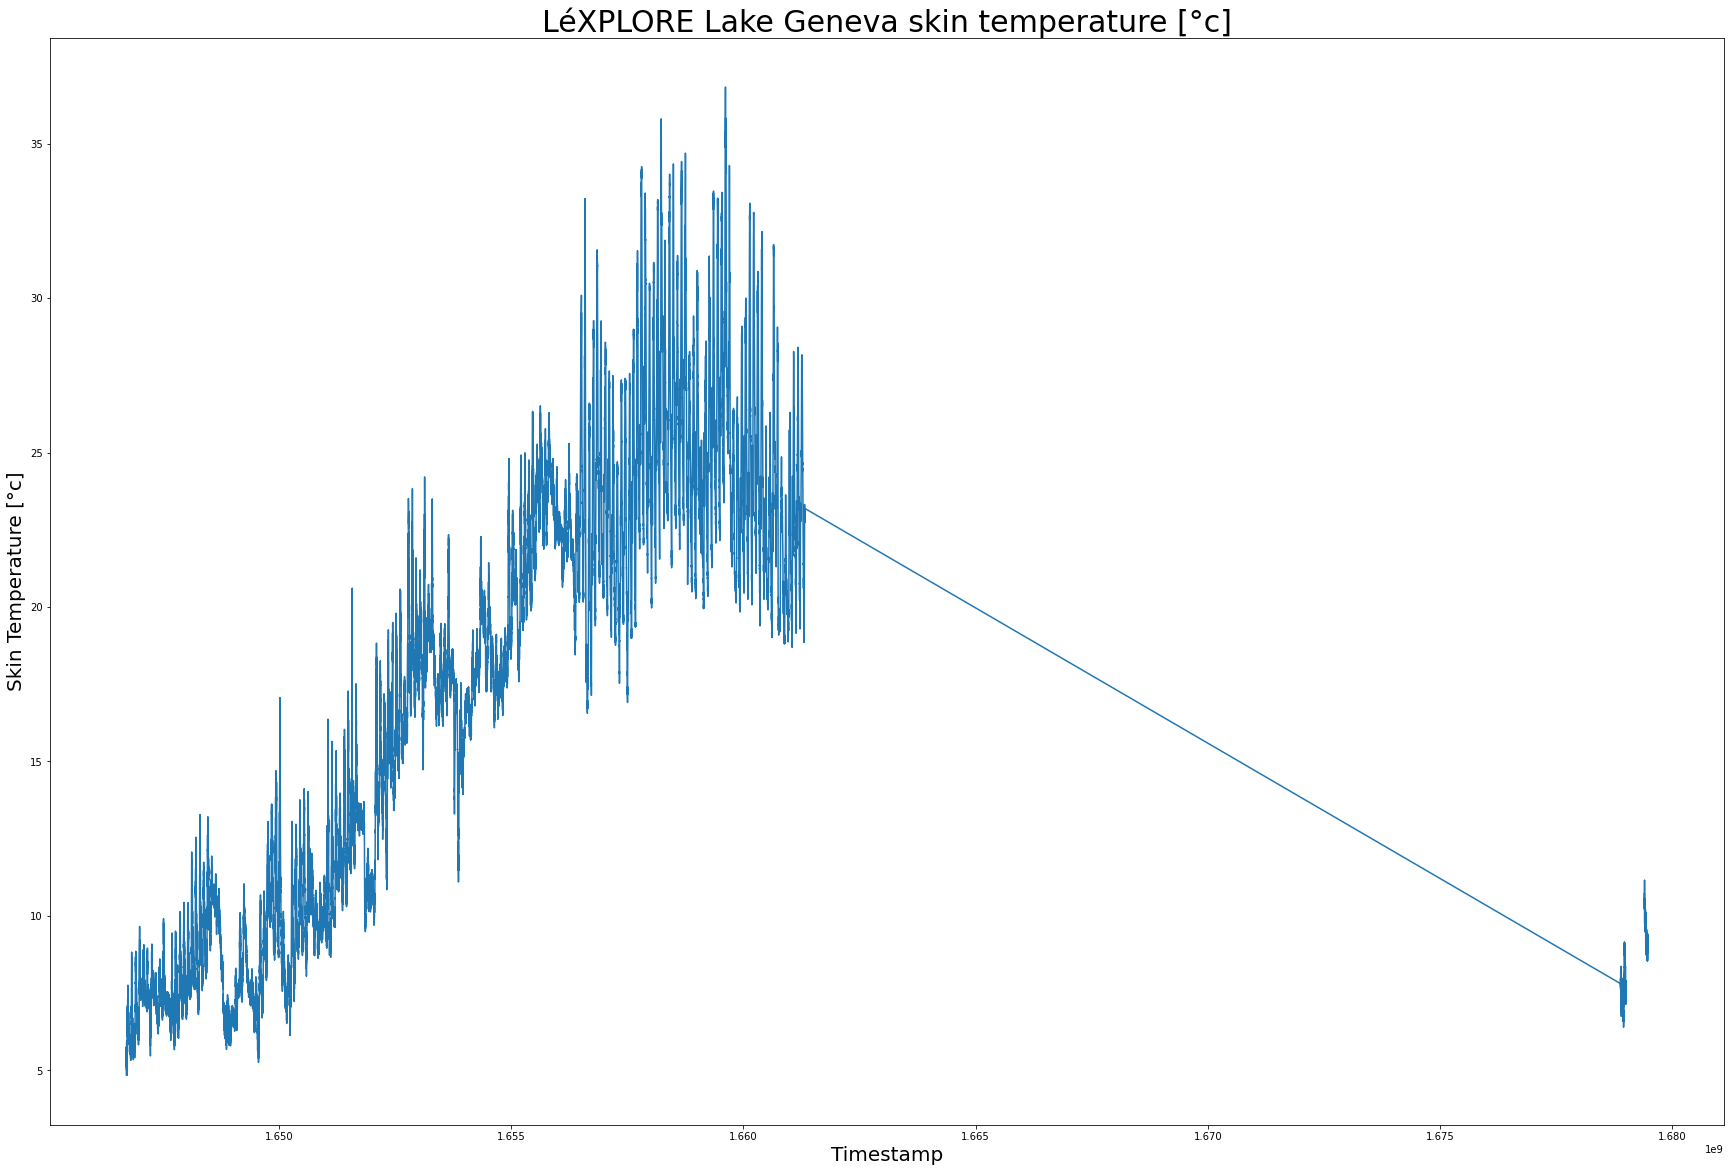

In [13]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (30, 20)
plt.plot(gplot.x, gplot.y)
plt.title("LéXPLORE Lake Geneva skin temperature [°c]", fontsize = 30)
plt.ylabel("Skin Temperature [°c]", fontsize = 20)
plt.xlabel("Timestamp", fontsize = 20)


Text(0.5, 0, 'Timestamp')

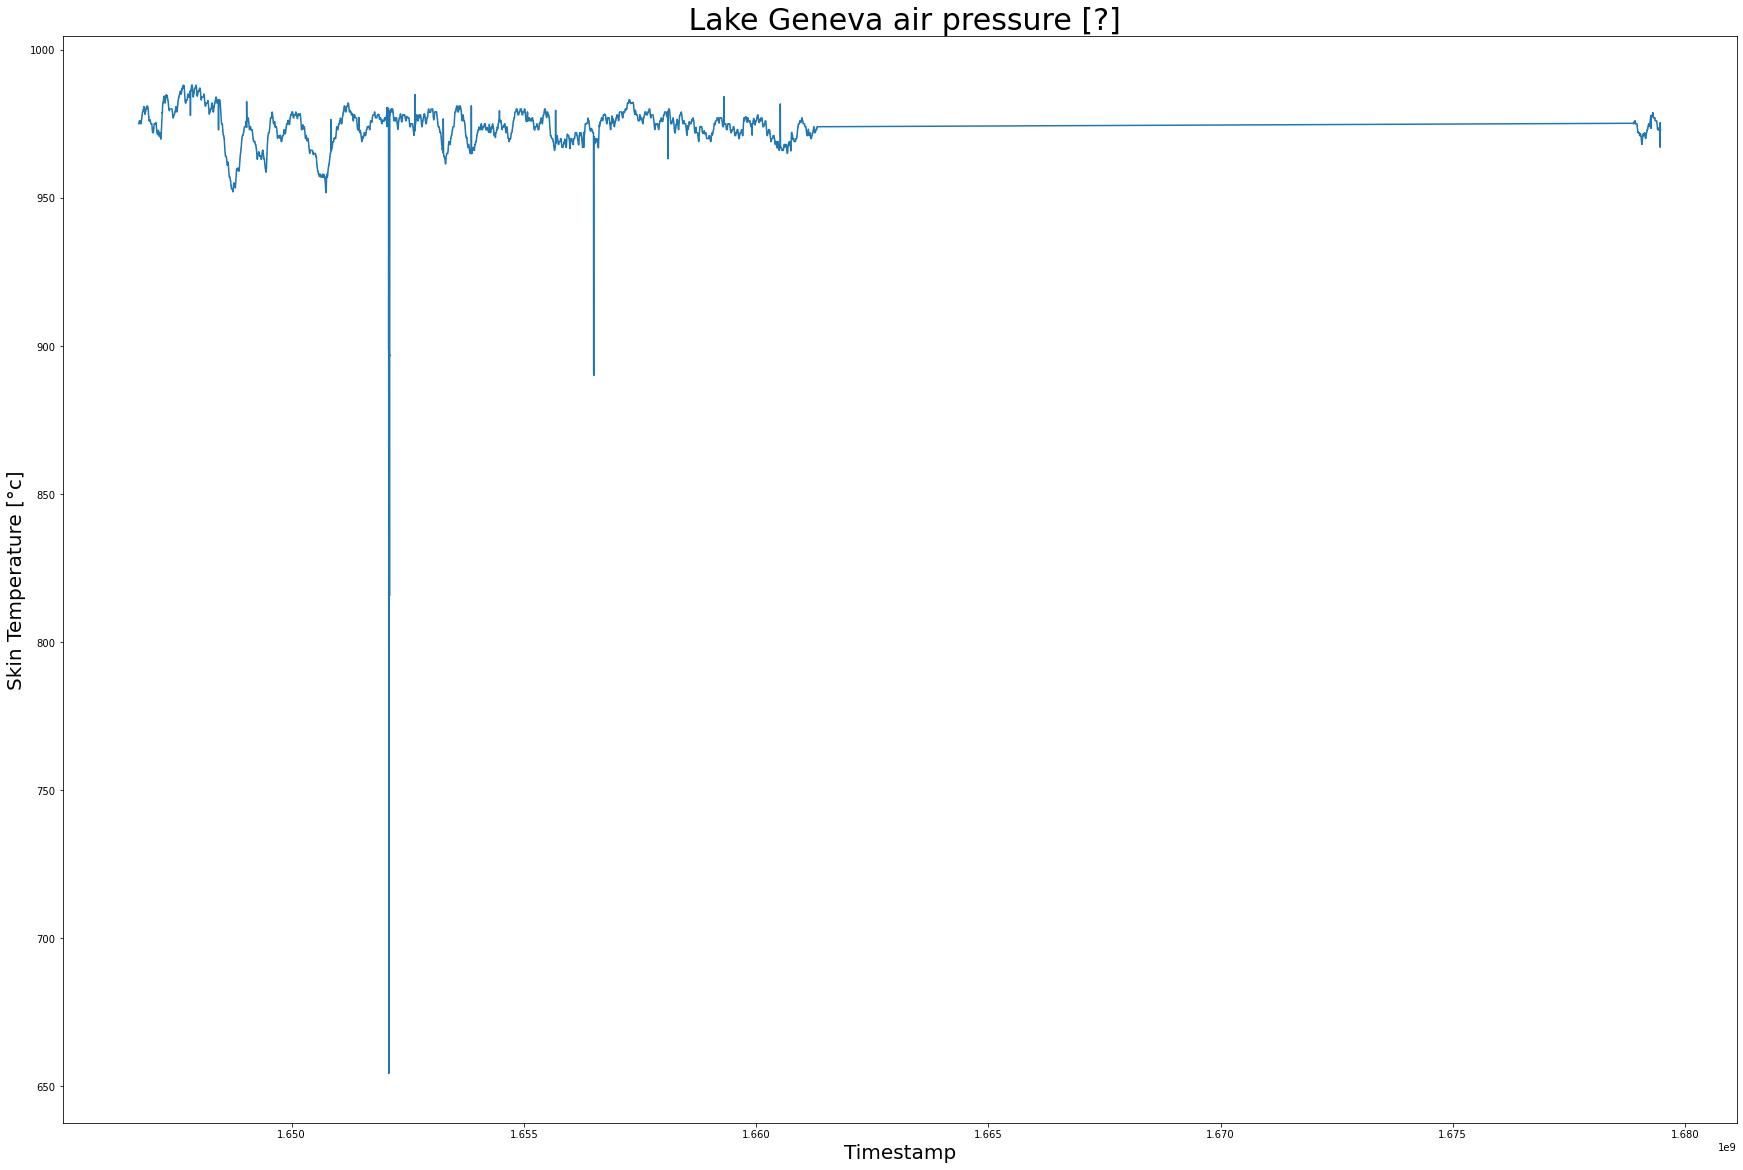

In [14]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (30, 20)
plt.plot(gplot.x, gplot.air_pressure)
plt.title(" Lake Geneva air pressure [?]", fontsize = 30)
plt.ylabel("Skin Temperature [°c]", fontsize = 20)
plt.xlabel("Timestamp", fontsize = 20)


Text(0.5, 0, 'Timestamp')

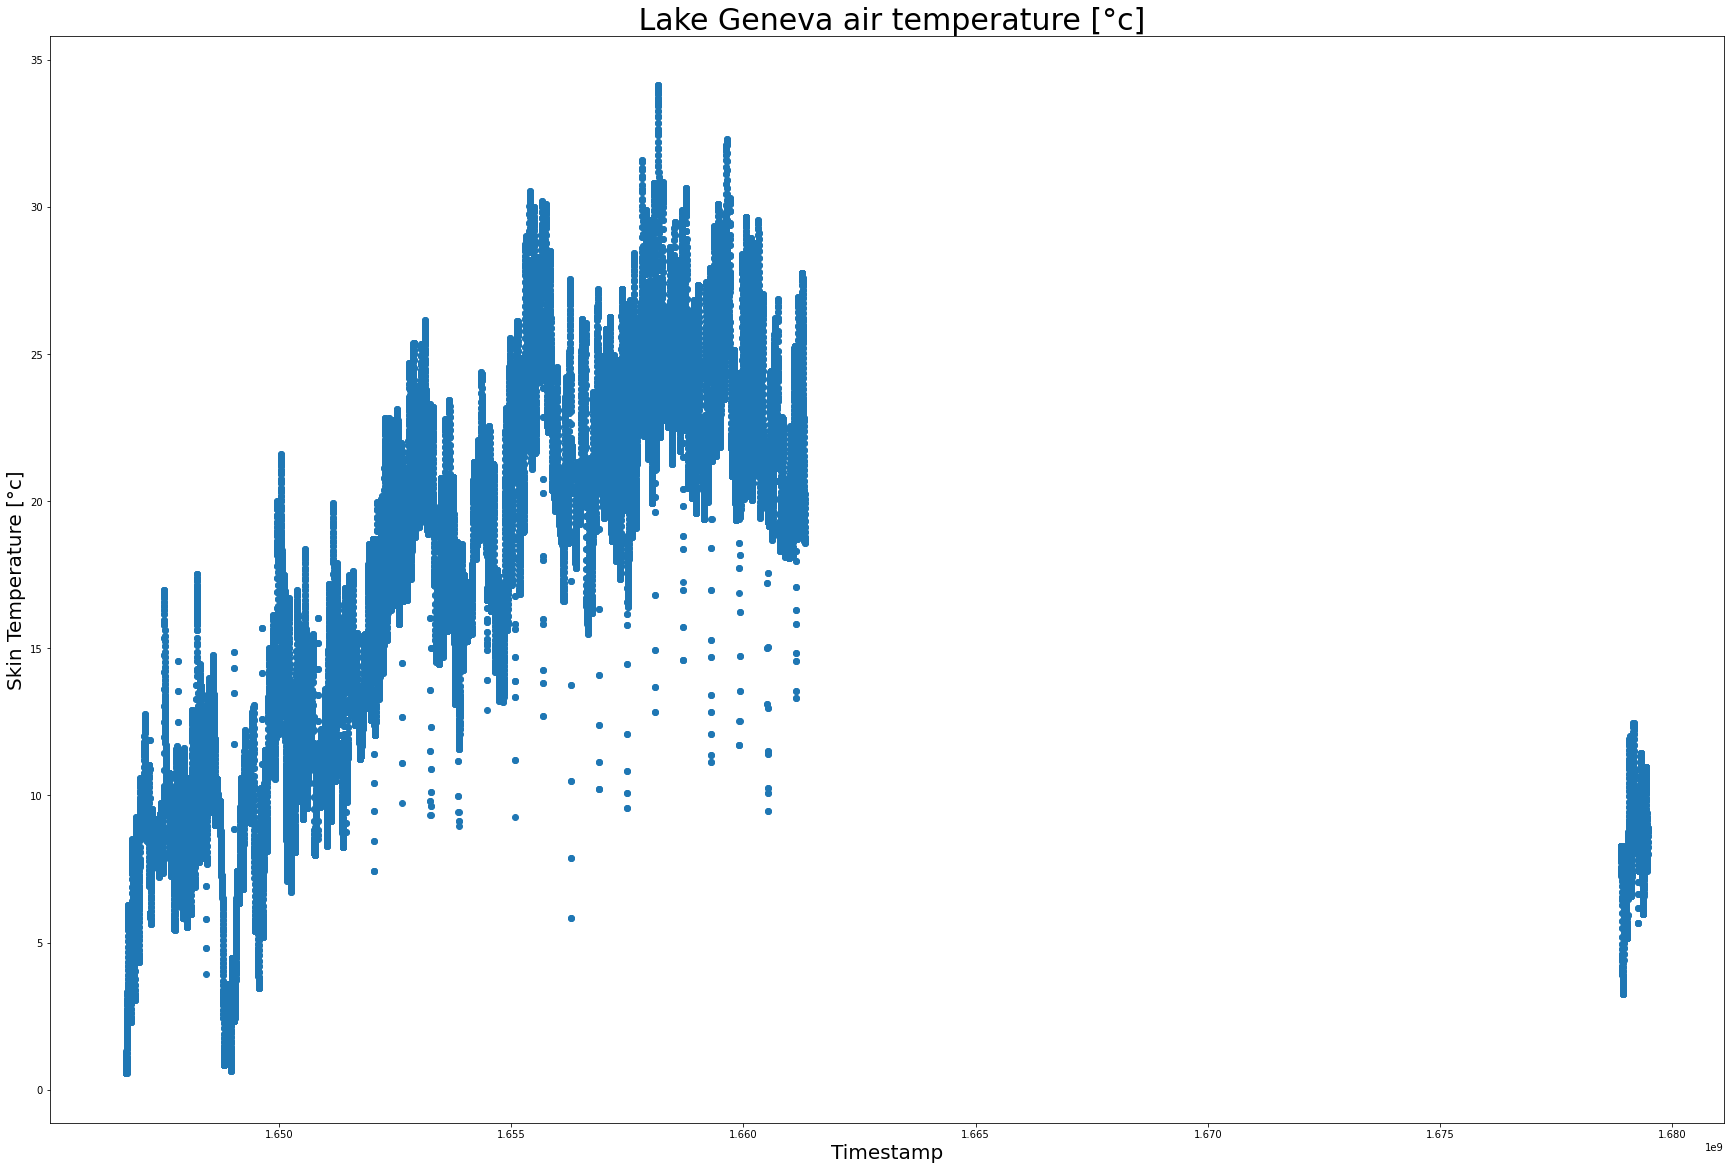

In [15]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (30, 20)
plt.scatter(gplot.x, gplot.air_temp)
plt.title(" Lake Geneva air temperature [°c]", fontsize = 30)
plt.ylabel("Skin Temperature [°c]", fontsize = 20)
plt.xlabel("Timestamp", fontsize = 20)


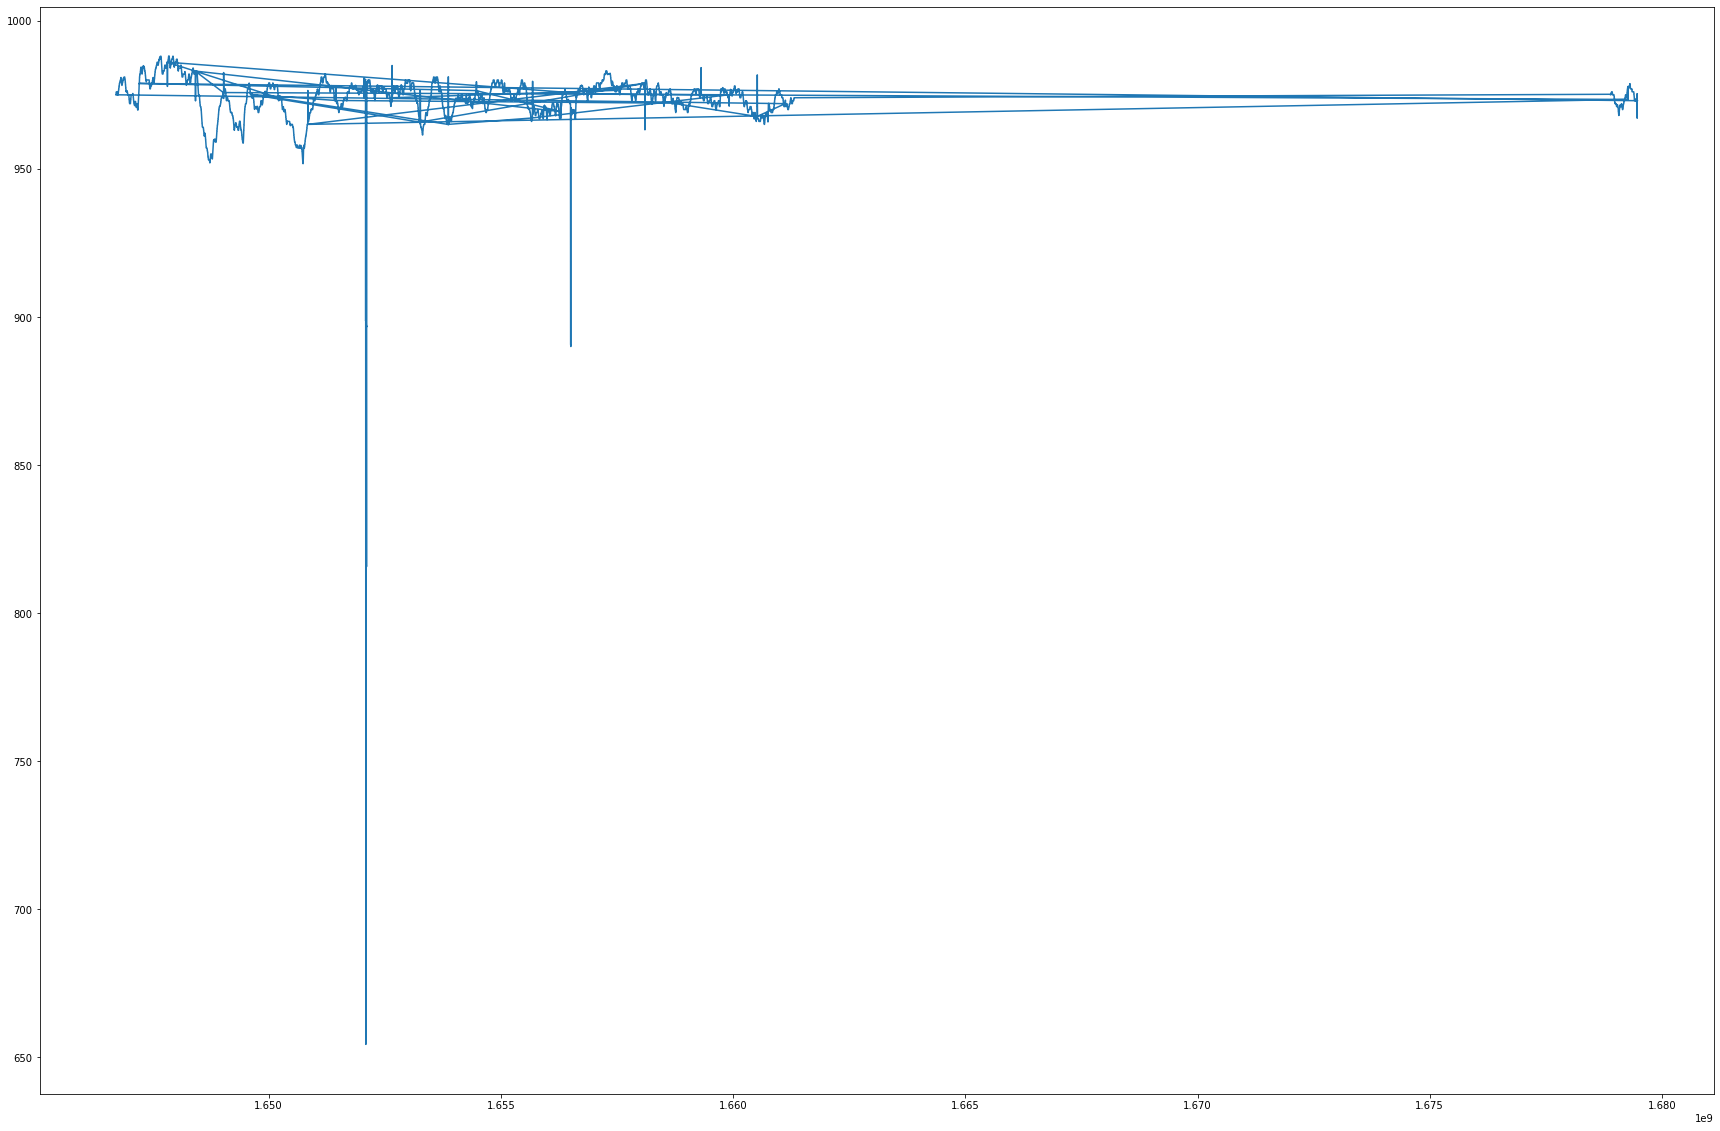

In [21]:
plt.plot(geneva['x'], geneva['air_pressure'])

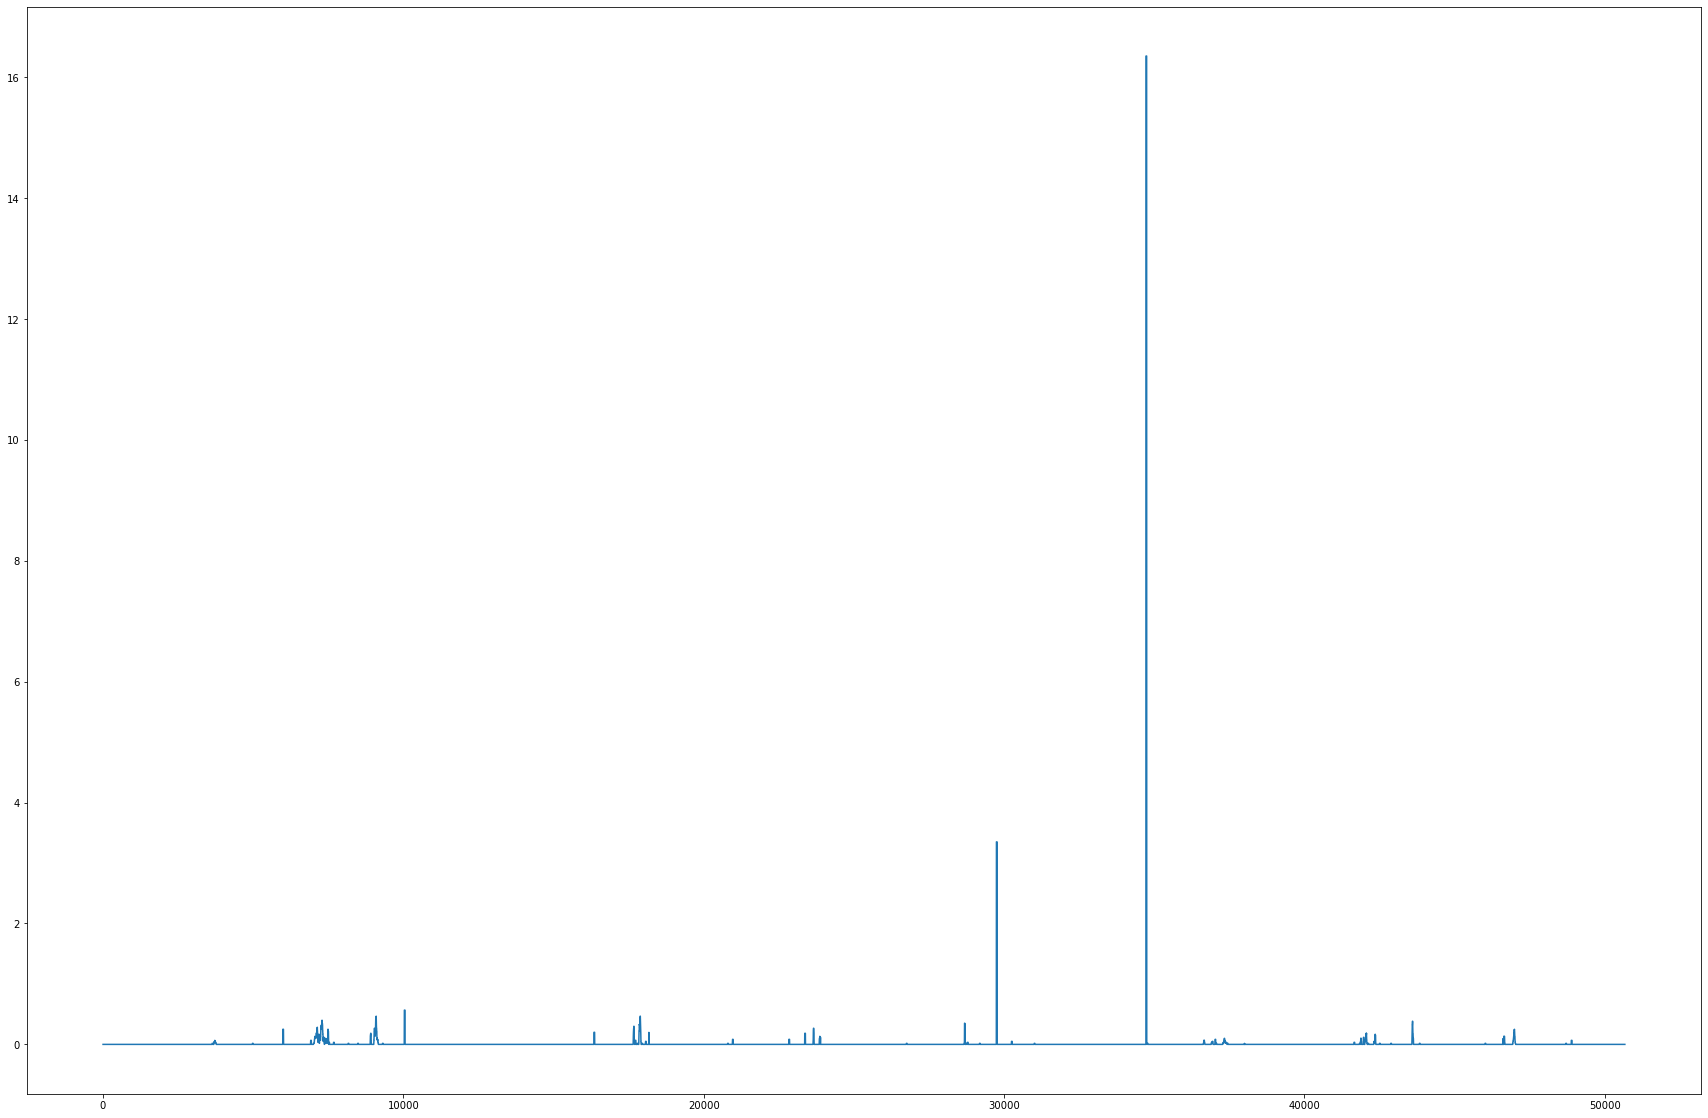

In [17]:
plt.plot(geneva['rainfall'])

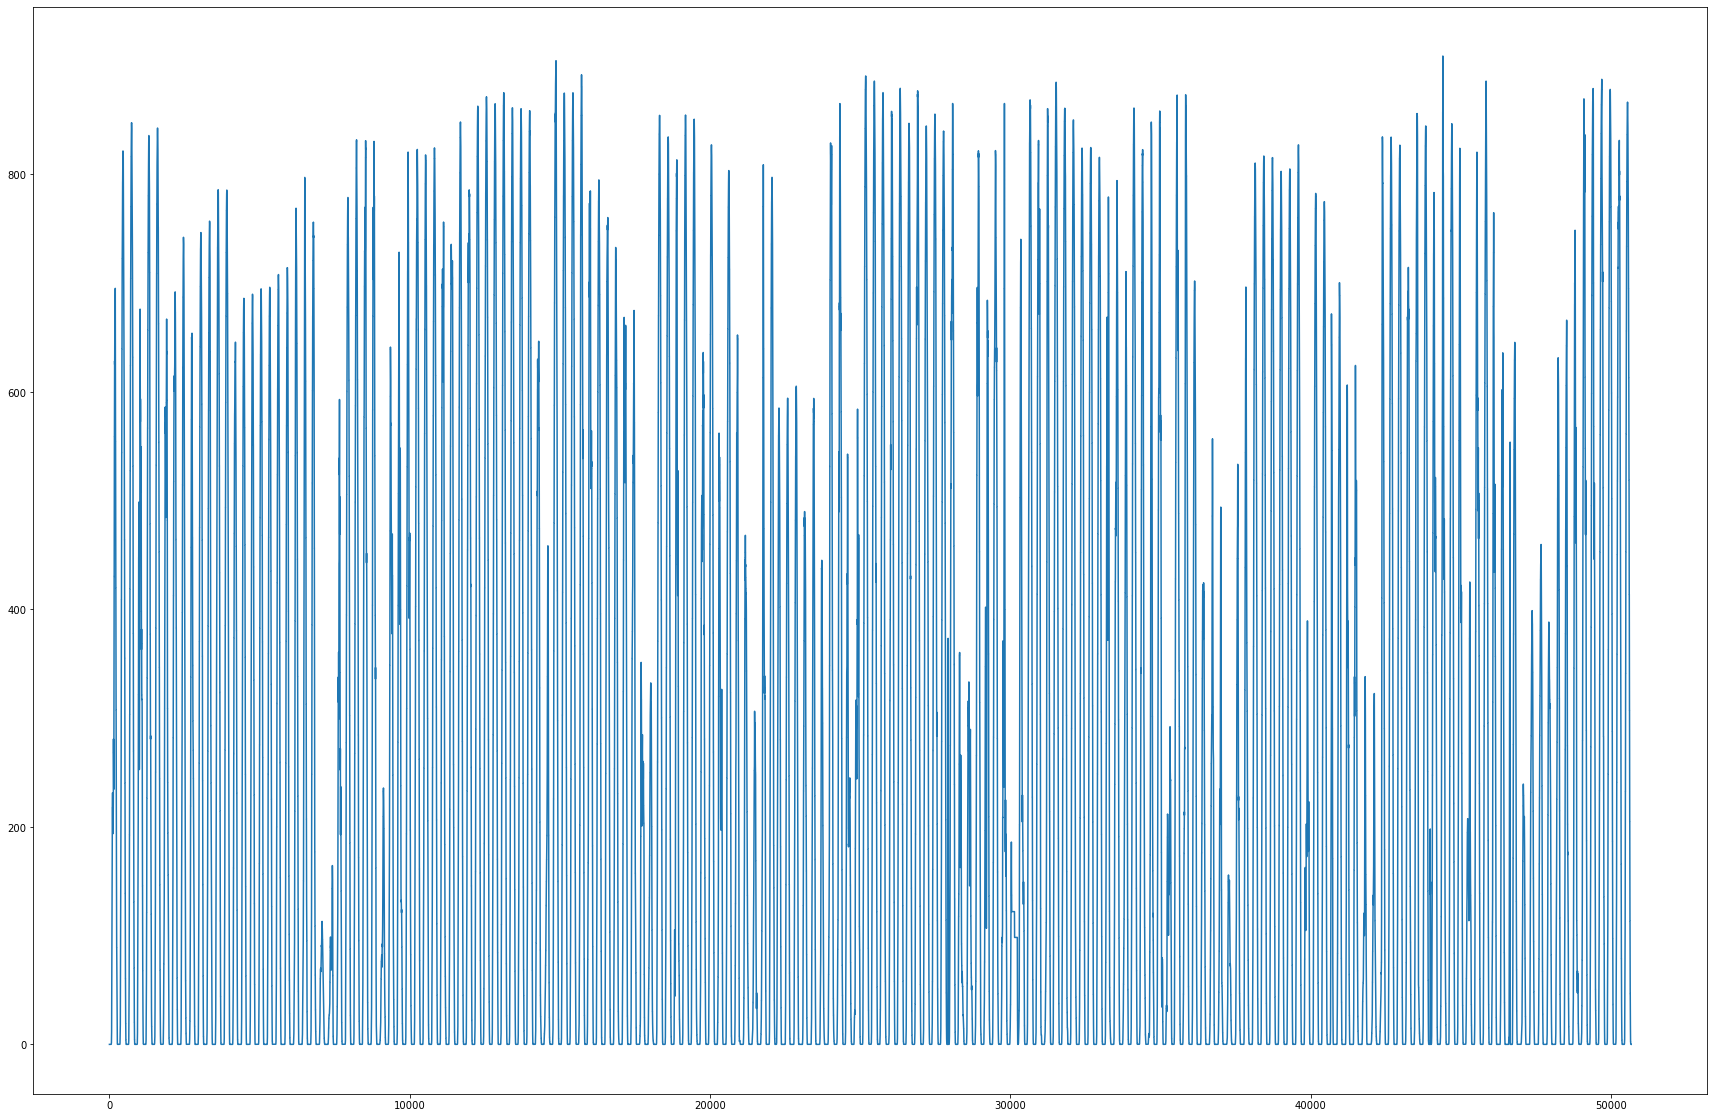

In [18]:
plt.plot(geneva['sol_irr'])

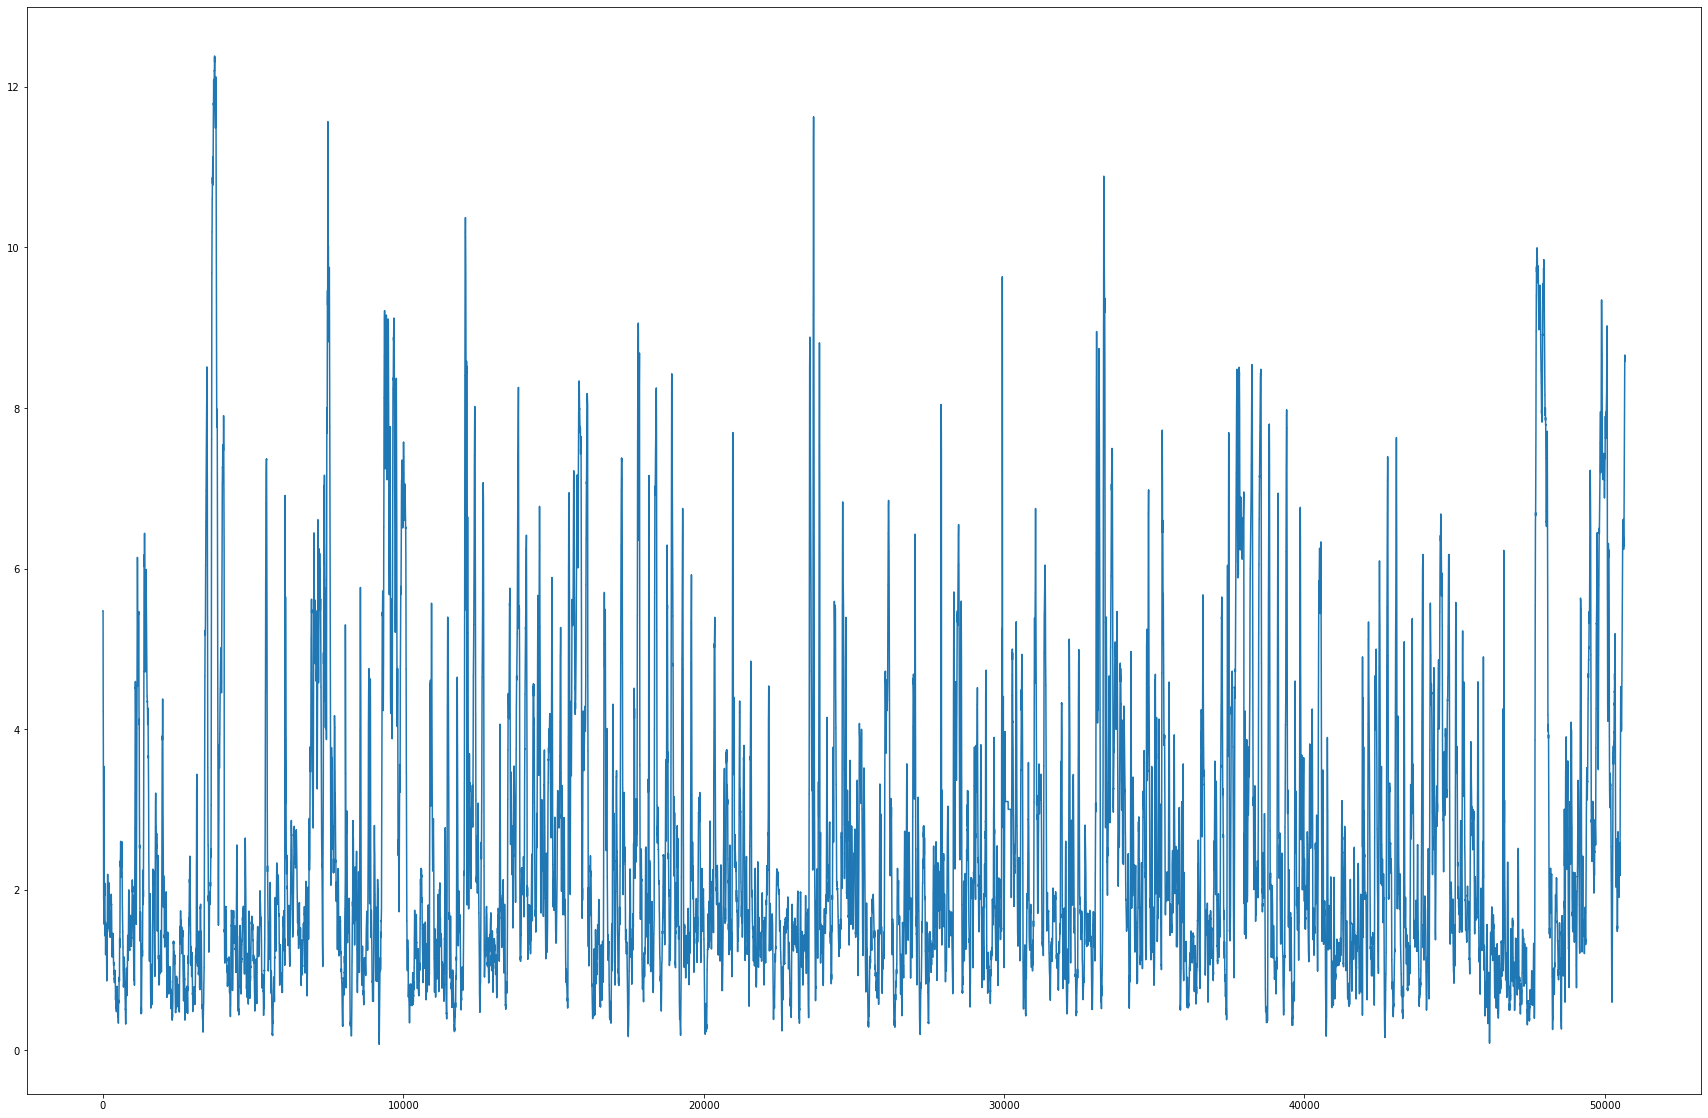

In [19]:
plt.plot(geneva['wind_speed'])

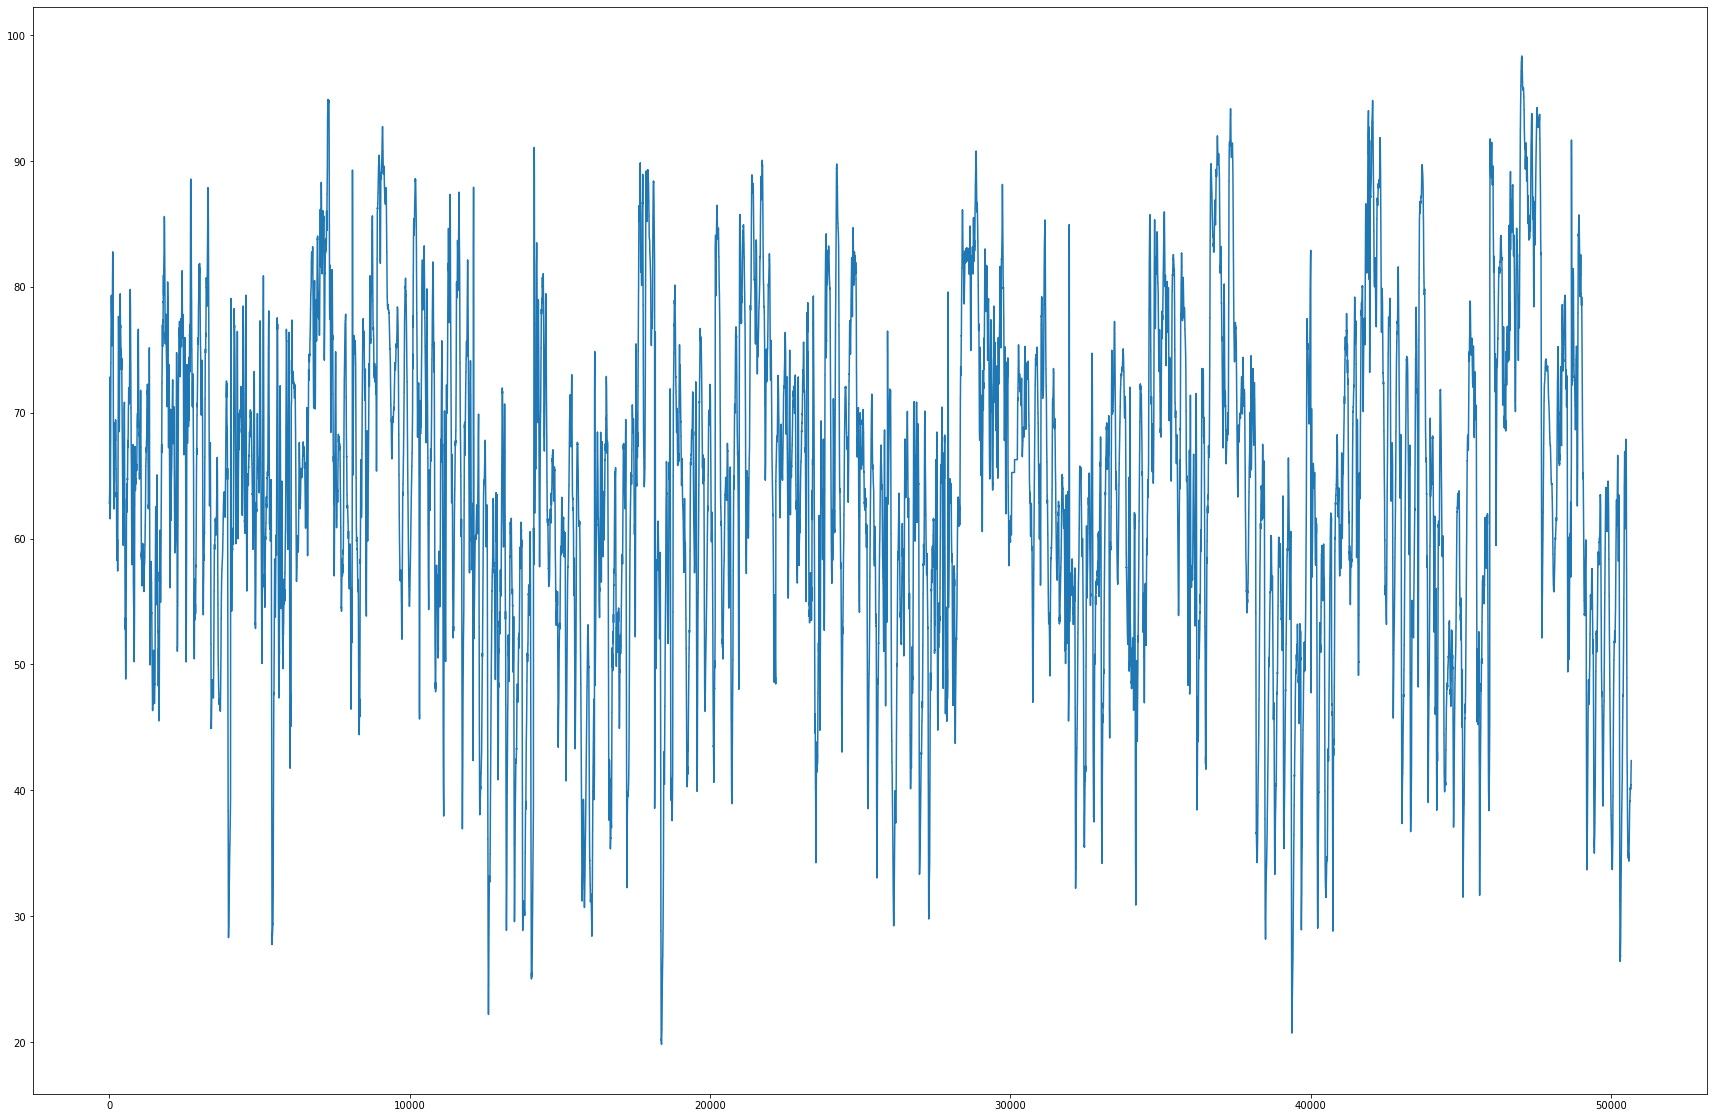

In [20]:
plt.plot(geneva['x'], geneva['rel_humidity'])